In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM cosmos''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cosmos,ATOM,2019-03-15 23:59:59,7.715249,6.432468,6.633174,7.504351,6.057301e+06,0.0
1,2,Cosmos,ATOM,2019-03-16 23:59:59,8.305615,6.694531,7.507990,7.383882,3.477393e+06,0.0
2,3,Cosmos,ATOM,2019-03-17 23:59:59,7.357443,4.727895,7.357443,4.776164,2.653565e+06,0.0
3,4,Cosmos,ATOM,2019-03-18 23:59:59,5.229982,4.828242,4.828242,5.110341,2.567201e+06,0.0
4,5,Cosmos,ATOM,2019-03-19 23:59:59,5.206172,4.794501,5.099978,4.821883,3.891084e+06,0.0


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        845 non-null    object 
 1   Symbol      845 non-null    object 
 2   Date        845 non-null    object 
 3   High        845 non-null    float64
 4   Low         845 non-null    float64
 5   Open        845 non-null    float64
 6   Close       845 non-null    float64
 7   Volume      845 non-null    float64
 8   Marketcap   845 non-null    float64
 9   Range       845 non-null    float64
 10  Difference  845 non-null    float64
dtypes: float64(8), object(3)
memory usage: 72.7+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        845 non-null    object        
 1   Symbol      845 non-null    object        
 2   Date        845 non-null    datetime64[ns]
 3   High        845 non-null    float64       
 4   Low         845 non-null    float64       
 5   Open        845 non-null    float64       
 6   Close       845 non-null    float64       
 7   Volume      845 non-null    float64       
 8   Marketcap   845 non-null    float64       
 9   Range       845 non-null    float64       
 10  Difference  845 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 72.7+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,845.000000,845.000000,845.000000,845.000000,8.450000e+02,8.450000e+02,845.000000,845.000000
mean,7.141688,6.367329,6.759896,6.768099,2.963413e+08,1.332950e+09,0.774359,0.008203
std,6.347047,5.496657,5.930911,5.936096,3.513583e+08,1.307956e+09,1.125234,0.761866
min,1.813534,1.130963,1.652300,1.649203,2.567201e+06,0.000000e+00,0.040087,-8.917866
25%,3.533852,3.193769,3.347086,3.346352,1.216053e+08,5.611565e+08,0.214408,-0.148773
50%,4.687904,4.285959,4.476964,4.480583,1.799694e+08,8.437392e+08,0.361984,0.001009
75%,6.536582,5.838377,6.221525,6.221525,3.140994e+08,1.229058e+09,0.808869,0.160662
max,32.136865,26.906526,29.482372,29.435150,3.365948e+09,6.203966e+09,13.620423,3.797714


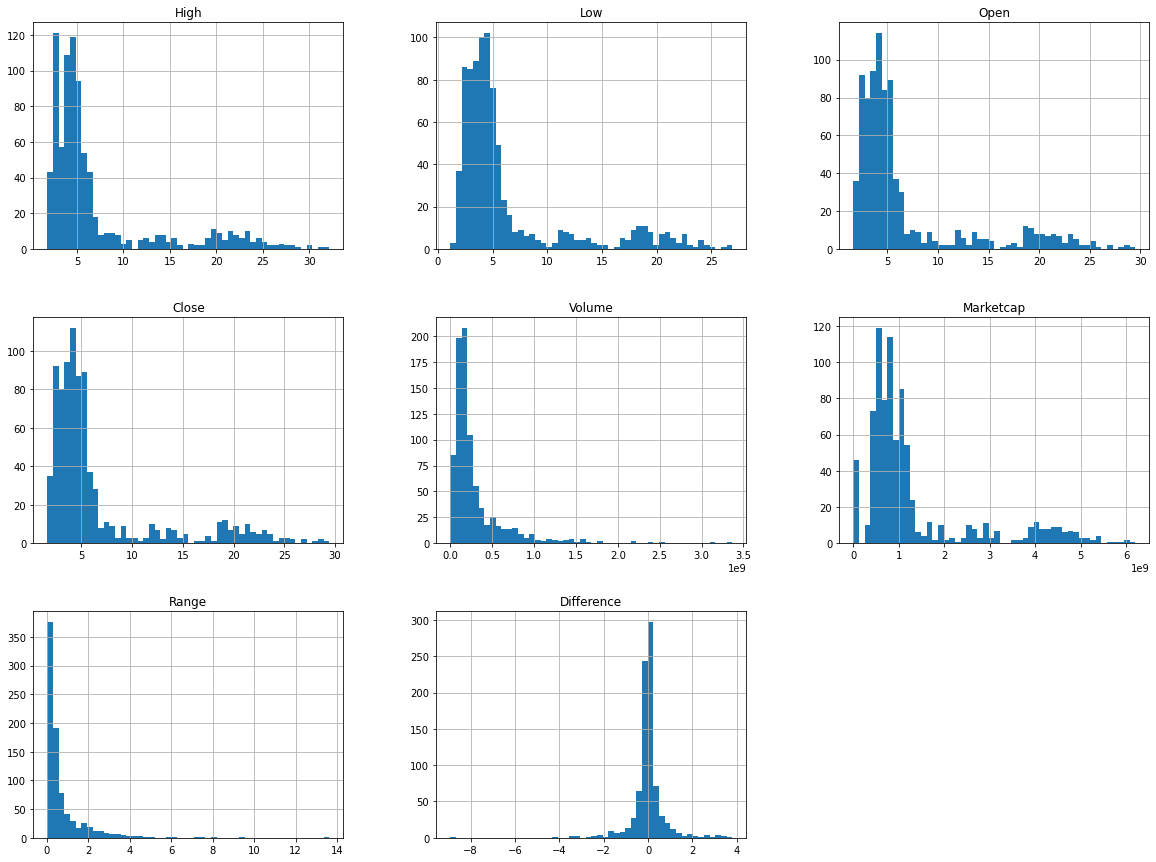

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,796,789,787,798,765,794,2,720,829,763
Date,2021-05-19 23:59:59,2021-05-12 23:59:59,2021-05-10 23:59:59,2021-05-21 23:59:59,2021-04-18 23:59:59,2021-05-17 23:59:59,2019-03-17 23:59:59,2021-03-04 23:59:59,2021-06-21 23:59:59,2021-04-16 23:59:59
Difference,-8.917866,-4.201326,-3.374013,-3.373991,-3.249535,-3.171753,-2.581279,-2.515612,-2.441834,-2.24525


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,782,700,773,761,703,784,797,693,699,801
Date,2021-05-05 23:59:59,2021-02-12 23:59:59,2021-04-26 23:59:59,2021-04-14 23:59:59,2021-02-15 23:59:59,2021-05-07 23:59:59,2021-05-20 23:59:59,2021-02-05 23:59:59,2021-02-11 23:59:59,2021-05-24 23:59:59
Difference,3.797714,3.476528,3.372512,3.285328,3.242341,3.220406,3.212204,2.980497,2.771804,2.755683


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

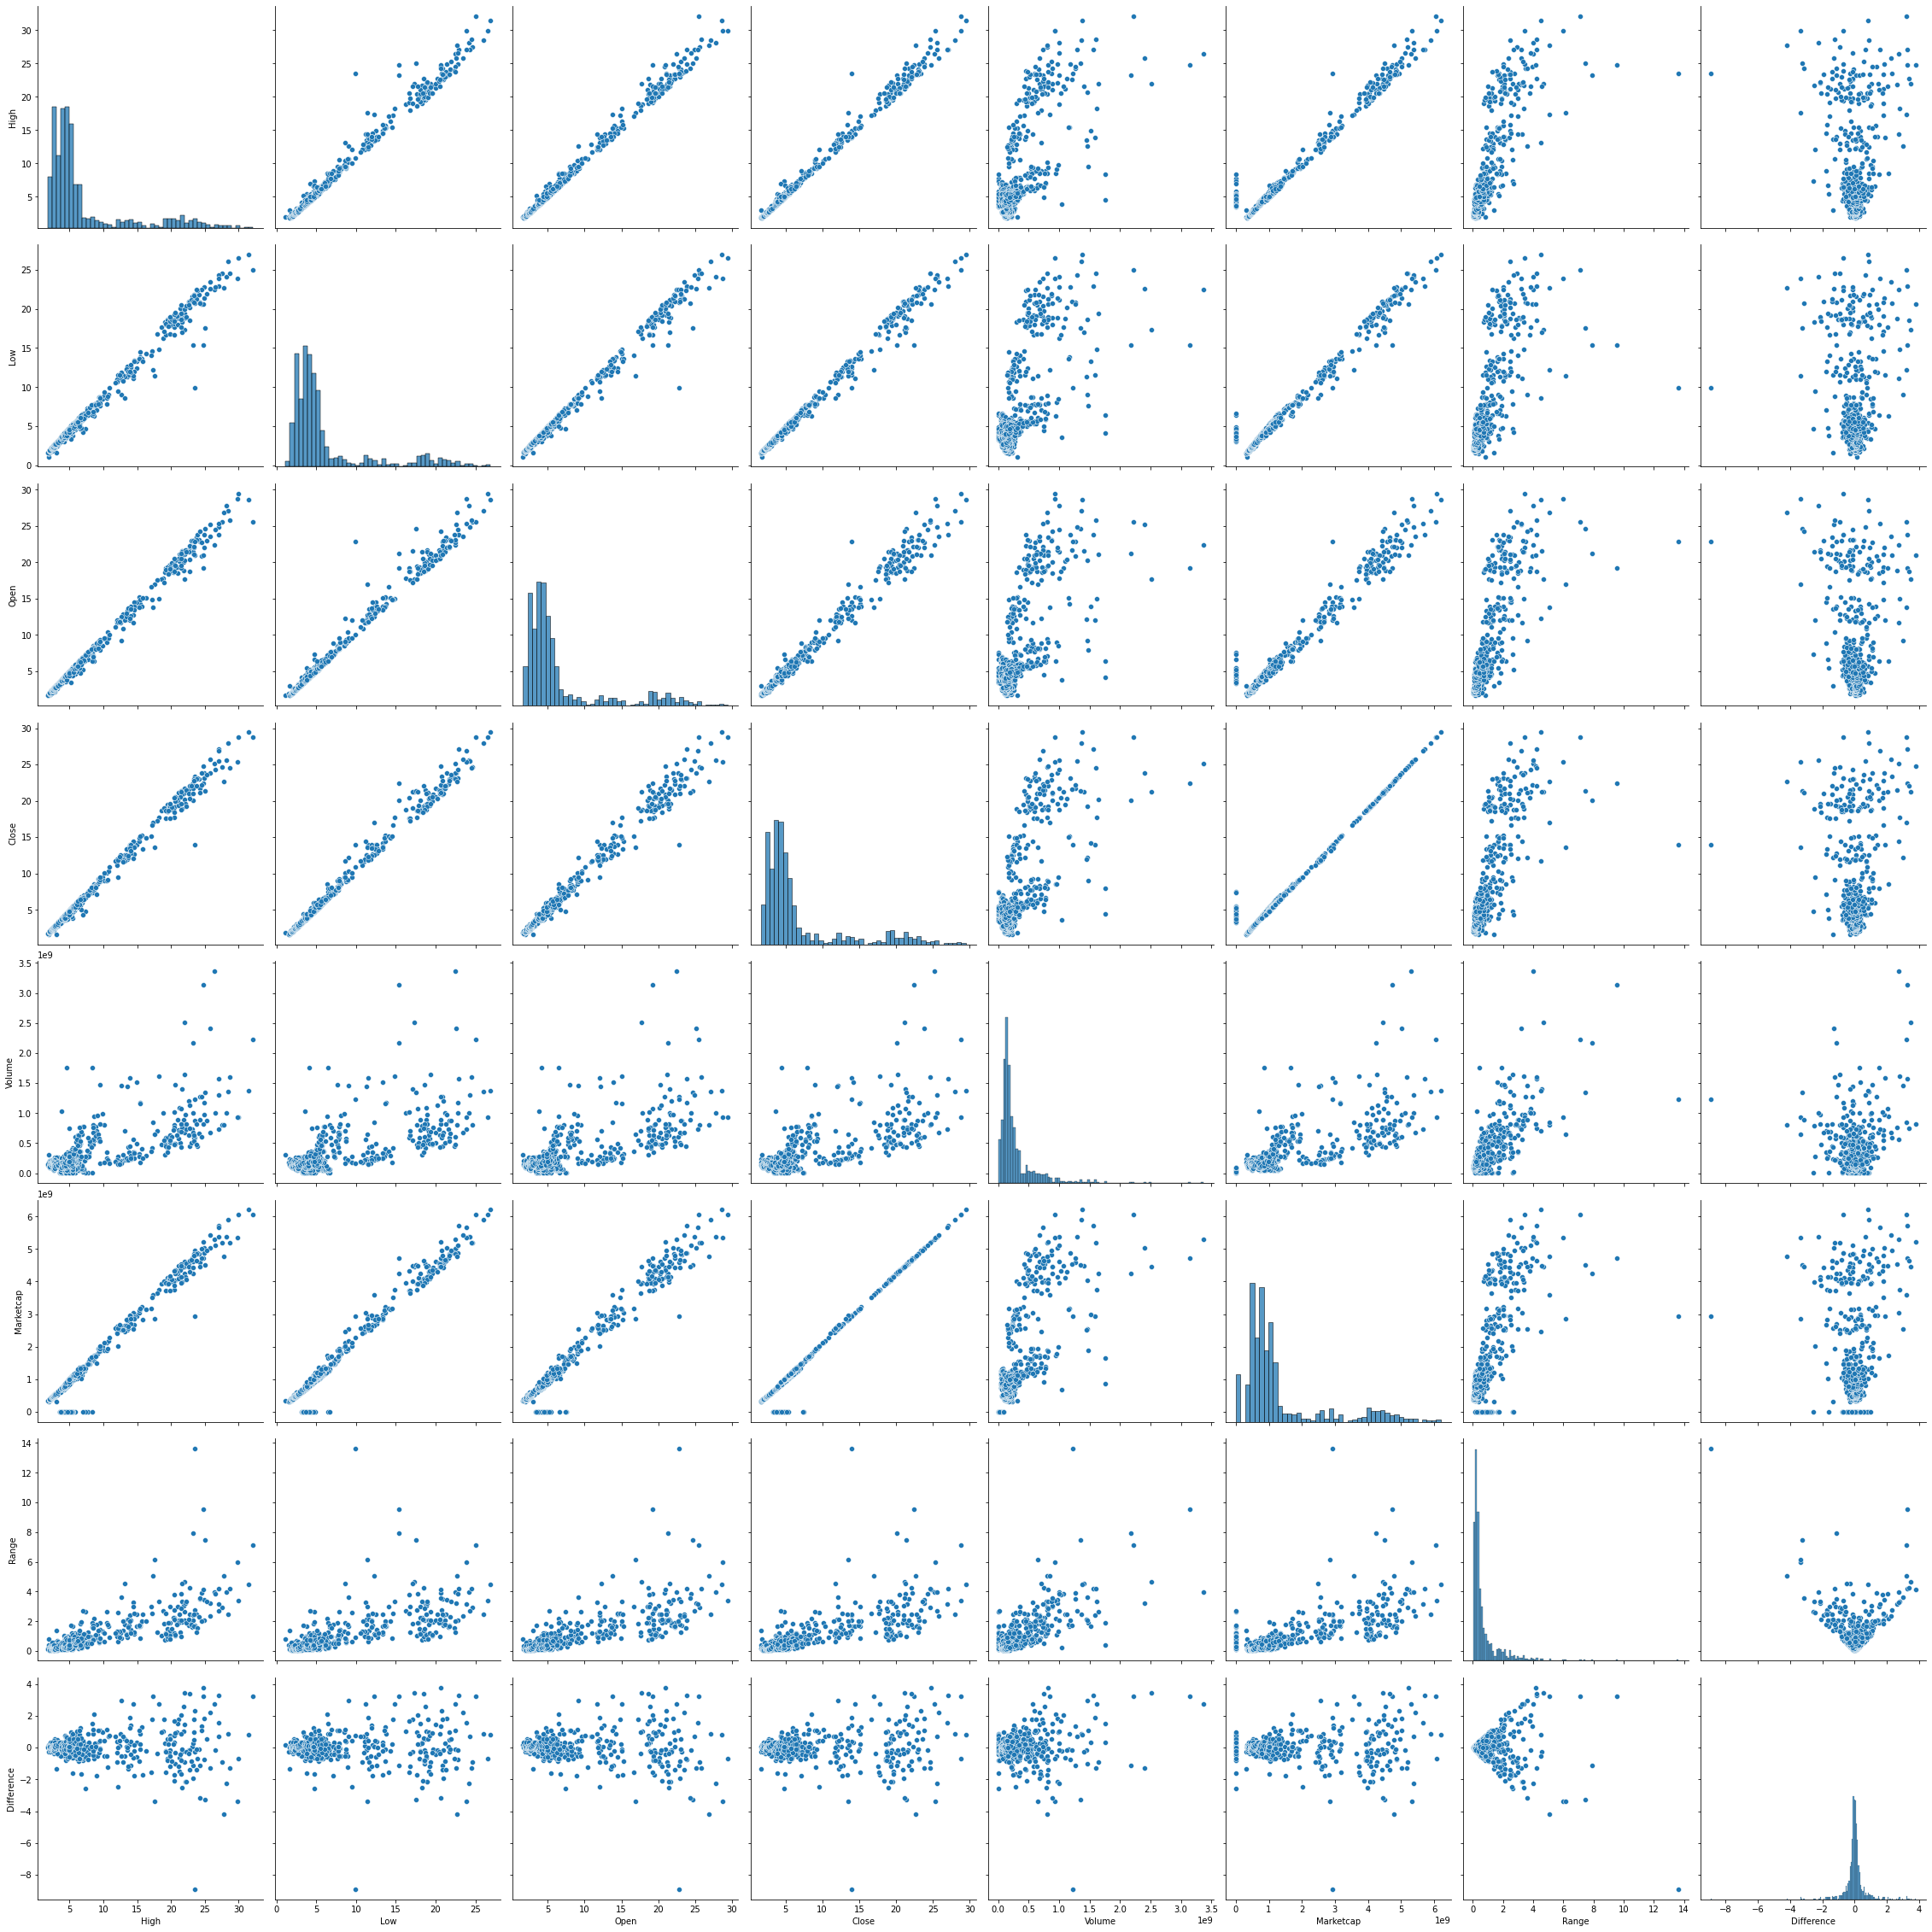

In [15]:
sns.pairplot(data,height=4);
